## Basic EDA
This notebook is where I look at some of the data to see how users rate courses and which courses are popular etc.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:

courses_file = 'data/Coursera_courses.csv'
coursedata_file = 'data/Coursera.csv'
ratings_file = 'data/Coursera_reviews.csv'

df_courses = pd.read_csv(courses_file)
df_coursedata = pd.read_csv(coursedata_file)
df_ratings = pd.read_csv(ratings_file)

In [8]:
print(df_courses.head())
print(df_coursedata.head())
print(df_ratings.head())

# Basic statistics
print(df_ratings.describe())


                                                name  \
0                                   Machine Learning   
1                                  Indigenous Canada   
2                          The Science of Well-Being   
3                     Technical Support Fundamentals   
4  Become a CBRS Certified Professional Installer...   

                 institution  \
0        Stanford University   
1      University of Alberta   
2            Yale University   
3                     Google   
4  Google - Spectrum Sharing   

                                          course_url  \
0    https://www.coursera.org/learn/machine-learning   
1   https://www.coursera.org/learn/indigenous-canada   
2  https://www.coursera.org/learn/the-science-of-...   
3  https://www.coursera.org/learn/technical-suppo...   
4  https://www.coursera.org/learn/google-cbrs-cpi...   

                        course_id  
0                machine-learning  
1               indigenous-canada  
2       the-science-of-we

In [9]:
df_courses.merge(
    df_coursedata,
    left_on='course_url',
    right_on='Course URL',
    how='inner'
).shape

df_coursedata['Course ID'] = df_coursedata['Course URL'].str.split('/').str[-1]


df_courses_full = df_courses.merge(
    df_coursedata.drop_duplicates('Course ID', keep='first'),
    left_on='course_id',
    right_on='Course ID',
    how='inner'
)

In [10]:
df_courses_full

,name,institution,course_url,course_id,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills,Course ID
0,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being,The Science of Well-Being,Yale University,Intermediate,4.8,https://www.coursera.org/learn/the-science-of-...,In this course you will engage in a series of ...,positive psychology mindfulness gratitude h...,the-science-of-well-being
1,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals,Technical Support Fundamentals,Google,Conversant,4.8,https://www.coursera.org/learn/technical-suppo...,This course is the first of a series that aims...,binary code internet Troubleshooting PC Har...,technical-support-fundamentals
2,Financial Markets,Yale University,https://www.coursera.org/learn/financial-marke...,financial-markets-global,Financial Markets,Yale University,Intermediate,4.6,https://www.coursera.org/learn/financial-marke...,"An overview of the ideas, methods, and institu...",Finance Planning Leadership and Management ...,financial-markets-global
3,Introduction to Psychology,Yale University,https://www.coursera.org/learn/introduction-ps...,introduction-psychology,Introduction to Psychology,Yale University,Beginner,4.8,https://www.coursera.org/learn/introduction-ps...,What are people most afraid of? What do our dr...,human behavior Critical Thinking happiness ...,introduction-psychology
4,Programming for Everybody (Getting Started wit...,University of Michigan,https://www.coursera.org/learn/python,python,Programming for Everybody (Getting Started wit...,University of Michigan,Conversant,4.8,https://www.coursera.org/learn/python,This course aims to teach everyone the basics ...,syntax language semantics Computer Programm...,python
...,...,...,...,...,...,...,...,...,...,...,...,...
477,Hypothesis-Driven Development,University of Virginia,https://www.coursera.org/learn/uva-darden-agil...,uva-darden-agile-testing,Hypothesis-Driven Development,University of Virginia,Intermediate,4.6,https://www.coursera.org/learn/uva-darden-agil...,"To deliver agile outcomes, you have to do more...",test-driven development software hypothesis ...,uva-darden-agile-testing
478,Accounting Data Analytics with Python,University of Illinois at Urbana-Champaign,https://www.coursera.org/learn/accounting-data...,accounting-data-analytics-python,Accounting Data Analytics with Python,University of Illinois at Urbana-Champaign,Advanced,3.6,https://www.coursera.org/learn/accounting-data...,This course focuses on developing Python skill...,data type relational database management syst...,accounting-data-analytics-python
479,Introduction to Molecular Spectroscopy,University of Manchester,https://www.coursera.org/learn/spectroscopy,spectroscopy,Introduction to Molecular Spectroscopy,University of Manchester,Beginner,4.7,https://www.coursera.org/learn/spectroscopy,The course introduces the three key spectrosco...,interpretation Chemical Engineering analysis...,spectroscopy
480,The fundamentals of hotel distribution,ESSEC Business School,https://www.coursera.org/learn/hotel-distribution,hotel-distribution,The fundamentals of hotel distribution,ESSEC Business School,Intermediate,4.7,https://www.coursera.org/learn/hotel-distribution,In today�s hotel sector an increasingly comple...,Hotel Management revenue management distribu...,hotel-distribution


## Ratings Distrubution
Visualising the distribution of ratings.

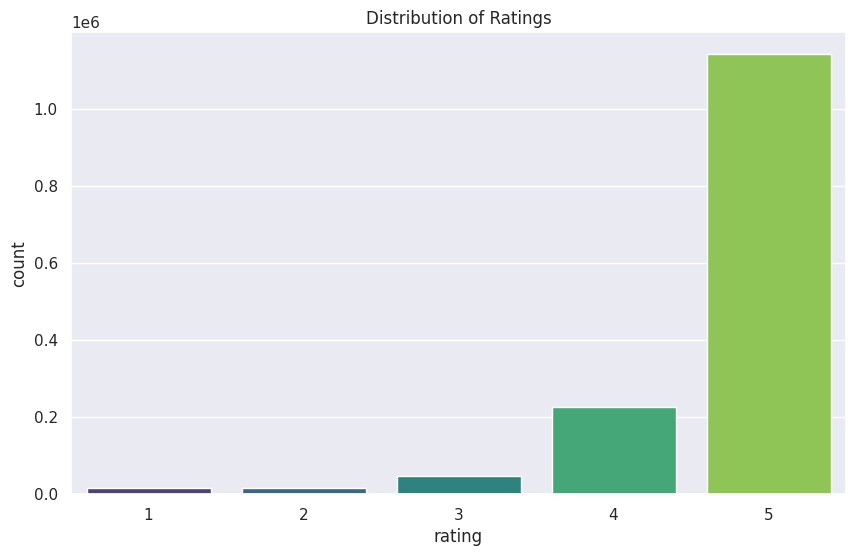

In [77]:
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df_ratings, palette='viridis')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')

plt.title('Distribution of Ratings')
plt.show()


In [82]:
df_ratings

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just two complete watches so I'm happy about that. As usual there were some questions on the final exam that were NO WHERE in the course, which is annoying but far better than many microsoft tests I have taken. Never found the suplimental material that the course references... but who cares... i passed!",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and screen shots would sho on the side of the text that the instructor is going thru so that user does not have to go all the way to beginning of text to be able to view any slides instructor is showing.,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself was a little annoying. I had to wait 30 to 45 minutes after watching the videos to to take the quiz. Other than that the information was perfect and passed the test with no issues!,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do a double take but all in all not bad.,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,Excellent course and the training provided was very detailed and easy to follow.,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training
...,...,...,...,...,...
1454706,g,By Brijesh K,"Aug 25, 2020",5,computer-networking
1454707,.,By Vasavi V M,"Jul 02, 2020",5,computer-networking
1454708,.,By Drishti D,"Jun 20, 2020",5,computer-networking
1454709,.,By FAUSTINE F K,"Jun 07, 2020",5,computer-networking


Text(0, 0.5, 'Count')

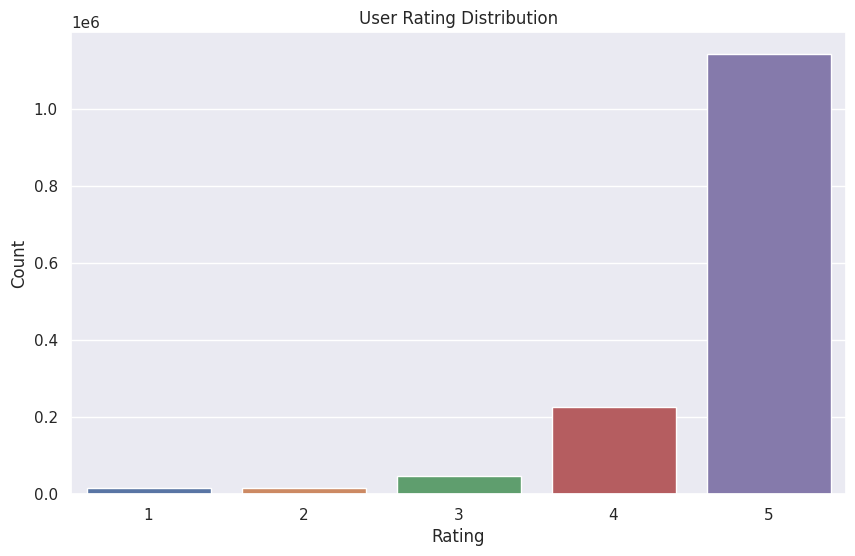

In [83]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='rating', data=df_ratings)
plt.title('User Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')

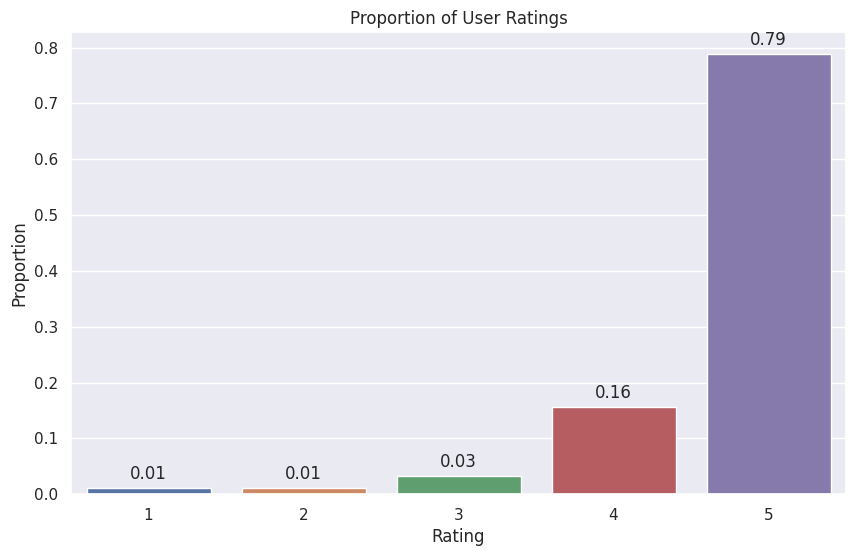

In [84]:
rating_proportions = df_ratings['rating'].value_counts(normalize=True)

# Create a bar plot for the rating proportions
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=rating_proportions.index, y=rating_proportions.values, order=range(1, 6))
plt.title('Proportion of User Ratings')
plt.xlabel('Rating')
plt.ylabel('Proportion')

# Display the proportion on the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.show()

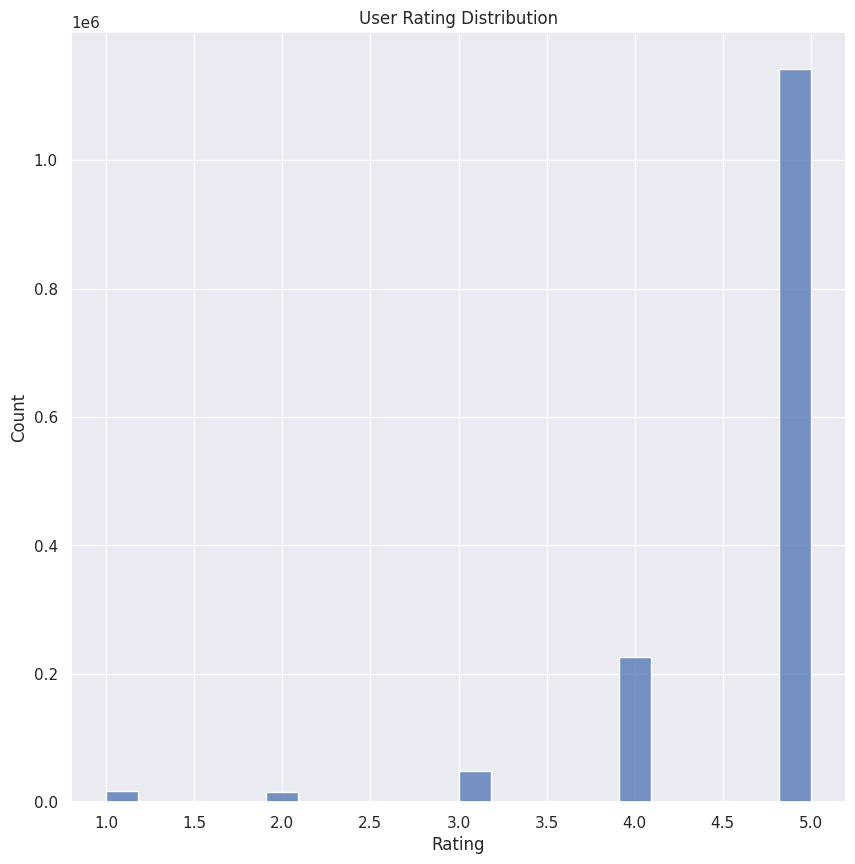

In [72]:
sns.histplot(data=df_ratings, x='rating', kde=False)  # Set kde to False to remove the KDE line
plt.title('User Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')  # Specify 'Count' to clarify that y-axis shows raw counts
plt.show()


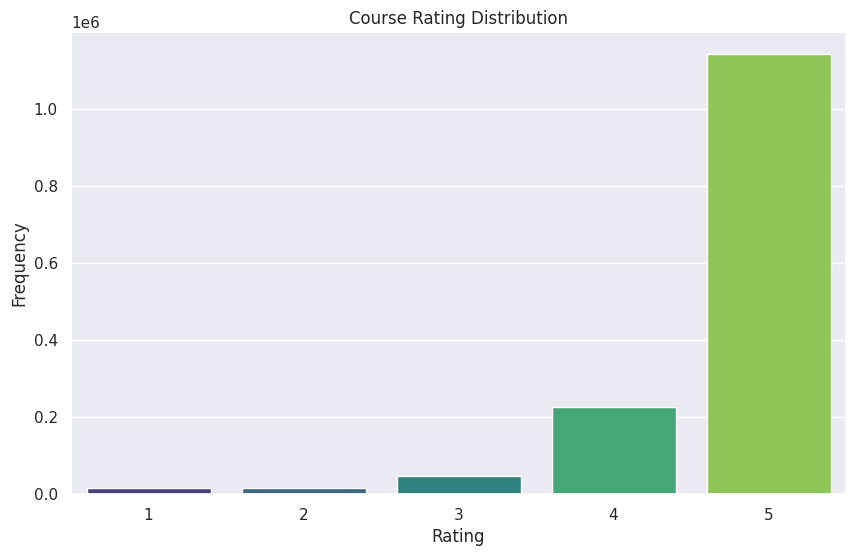

In [68]:

# Plotting the distribution of course ratings
plt.figure(figsize=(10, 6))
# ax = sns.countplot(x=df_ratings, palette='viridis')
ax = sns.countplot(x=df_ratings['rating'], palette='viridis')

# Setting the title and labels
ax.set_title('Course Rating Distribution')
ax.set_xlabel('Rating')
ax.set_ylabel('Frequency')

# Show the plot
plt.show()

## Course Popularity
Analysing which courses are rated most frequently.

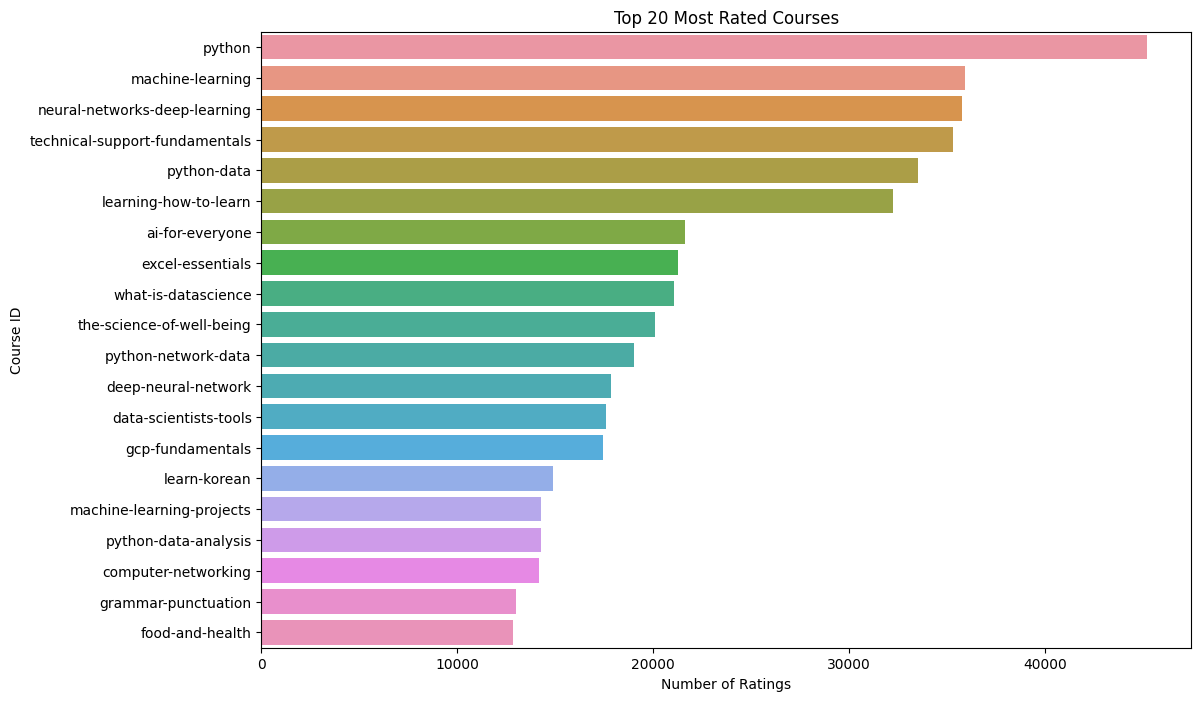

In [12]:
course_popularity = df_ratings['course_id'].value_counts().head(20)
plt.figure(figsize=(12, 8))
sns.barplot(x=course_popularity.values, y=course_popularity.index)
plt.title('Top 20 Most Rated Courses')
plt.xlabel('Number of Ratings')
plt.ylabel('Course ID')
plt.show()


## User Activity
Examining how many ratings each user has given.

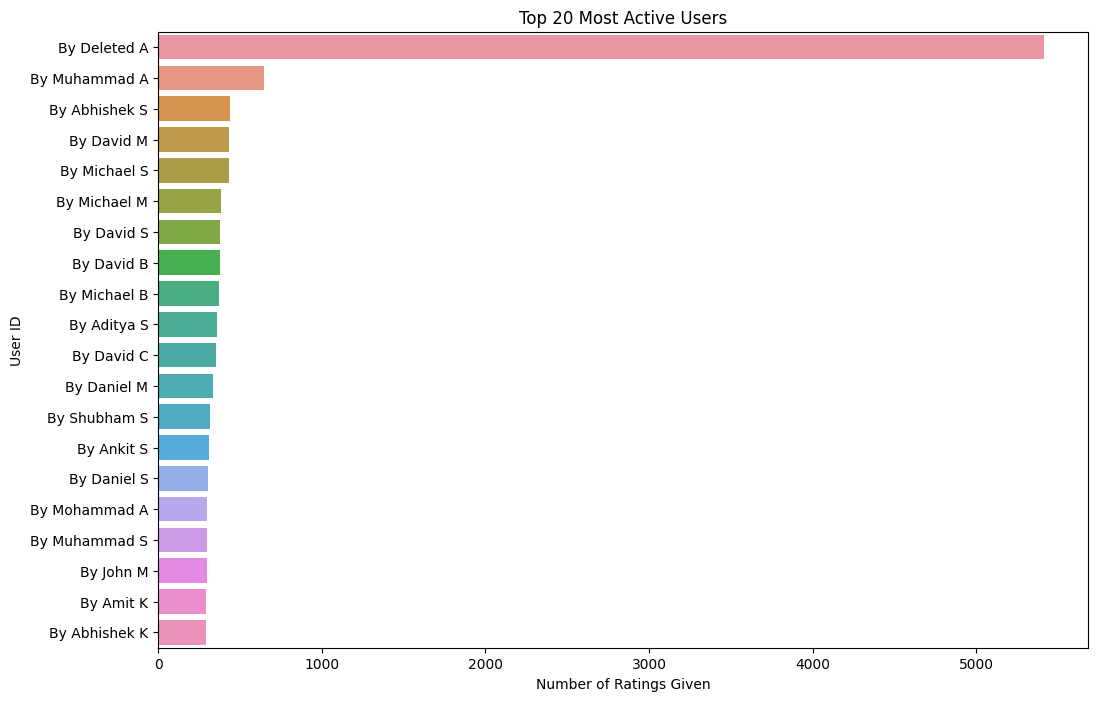

In [13]:
user_activity = df_ratings['reviewers'].value_counts().head(20)
plt.figure(figsize=(12, 8))
sns.barplot(x=user_activity.values, y=user_activity.index)
plt.title('Top 20 Most Active Users')
plt.xlabel('Number of Ratings Given')
plt.ylabel('User ID')
plt.show()


And without "Deleted A"

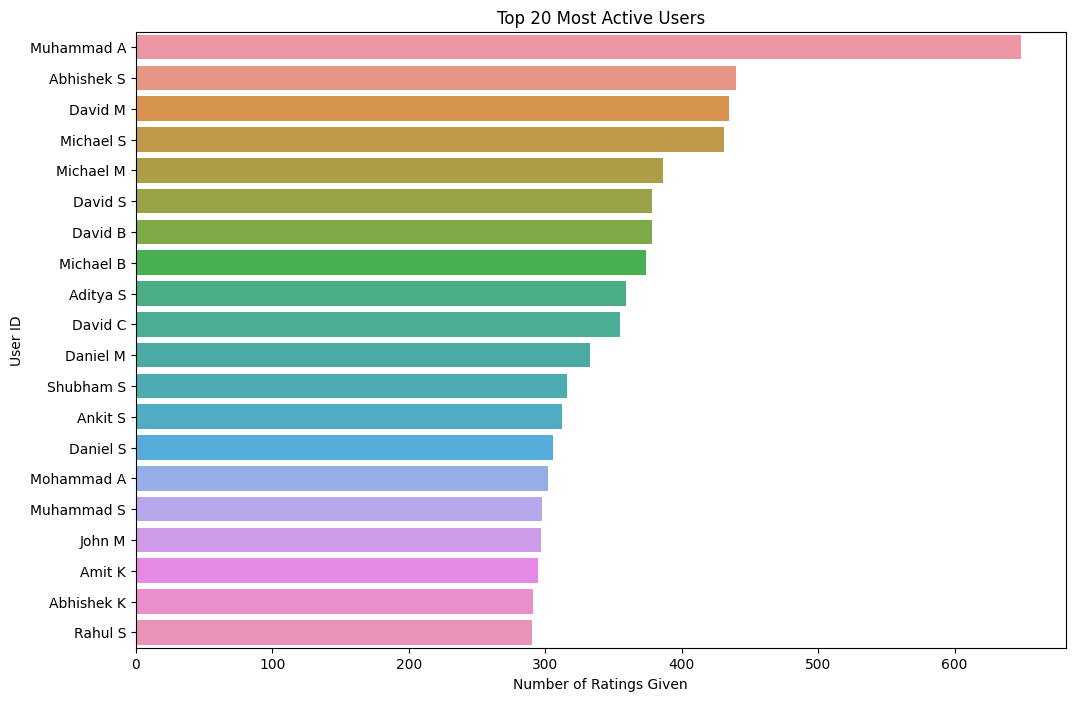

In [59]:
df_ratings_fixed = df_ratings.copy()
# Removing "Deleted A" reviewers
df_ratings_fixed = df_ratings_fixed[df_ratings_fixed['reviewers'] != 'By Deleted A']

# removing "By " from reviewers
df_ratings_fixed['reviewers'] = df_ratings_fixed['reviewers'].str.split(' ').str[1:].str.join(' ')

user_activity = df_ratings_fixed['reviewers'].value_counts().head(20)
plt.figure(figsize=(12, 8))
sns.barplot(x=user_activity.values, y=user_activity.index)
plt.title('Top 20 Most Active Users')
plt.xlabel('Number of Ratings Given')
plt.ylabel('User ID')
plt.show()


## Course Difficulty Level Distribution
Analysis of difficulty level distribution.

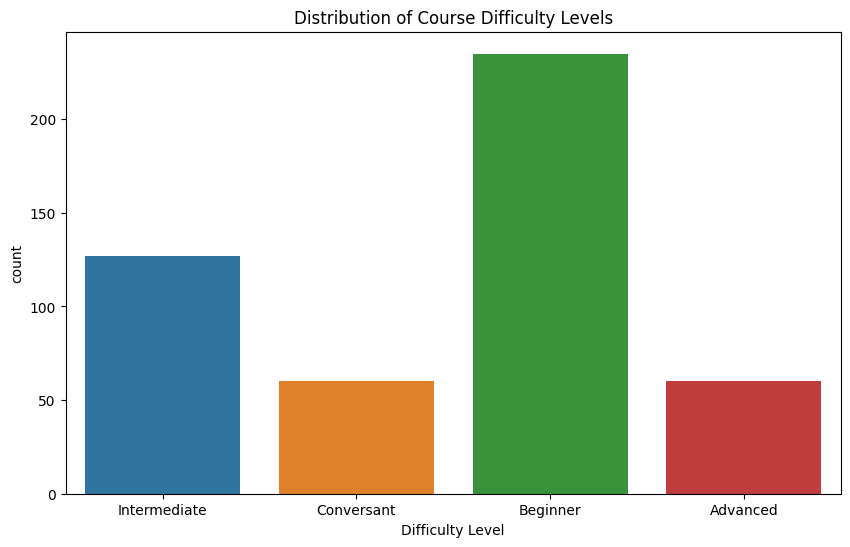

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Difficulty Level', data=df_courses_full)
plt.title('Distribution of Course Difficulty Levels')
plt.show()

## Rating vs Difficulty Level
Investigate if there is any relationship between the difficulty level of a course and its ratings.

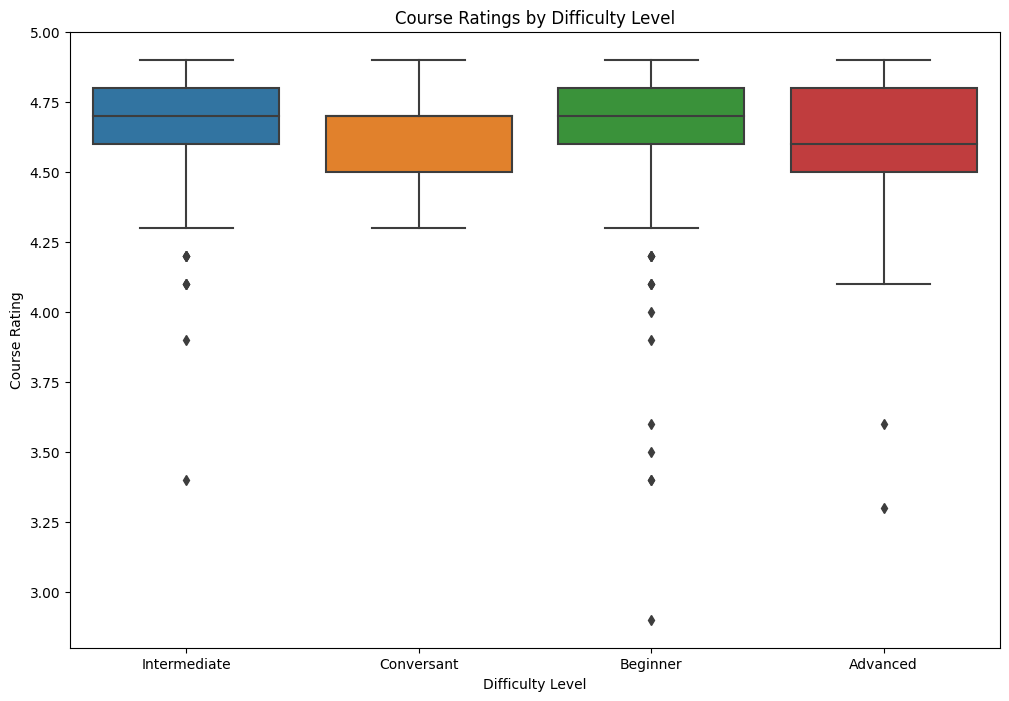

In [16]:
# Making Course Ratings Numeric
df_courses_full['Course Rating'] = df_courses_full['Course Rating'].str.split('/').str[0].astype(float)

plt.figure(figsize=(12, 8))
sns.boxplot(x='Difficulty Level', y='Course Rating', data=df_courses_full)
plt.title('Course Ratings by Difficulty Level')
plt.show()

From this, we can see that Intermediate courses have a tight distribution of ratings around the median, indicating consistency in ratings. With a few outliers who rated it lower.
Conversant courses have a bit lower median rating than Intermediate courses, with more variability seen by the taller box.
Beginner courses have a distribution similar to Conversant courses but with a slightly higher median rating. The presence of some outliers is also seen here.
Advanced courses have the widest range of ratings, which suggests that users opinions on these courses vary more significantly than the other levels. There are less outliers for these than Beginner courses.

## Sparsity of the User-Item Matrix
Trying to calculate/visualise the sparsity of the user-item matrix.
(not working atm)

In [18]:
user_item_matrix = df_ratings.pivot_table(index='reviewers', columns='course_id', values='rating', fill_value=0)
matrix_sparsity = np.count_nonzero(user_item_matrix) / user_item_matrix.size

plt.figure(figsize=(6, 4))
sns.heatmap(user_item_matrix == 0, vmin=0, vmax=1, cmap='viridis')
plt.title(f"User-Item matrix sparsity: {matrix_sparsity:.2%}")
plt.show()

: 

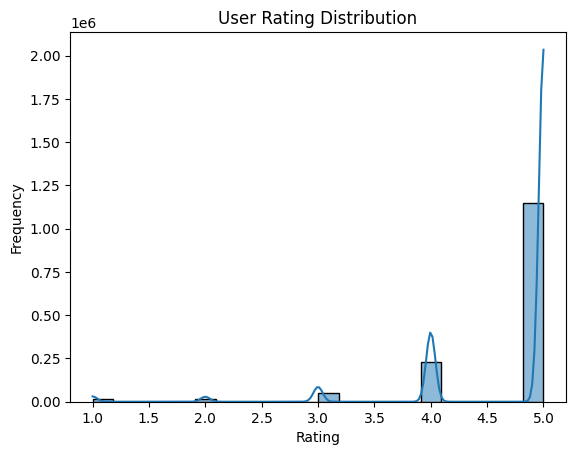

In [8]:
# Assuming `df_ratings` is your DataFrame with user ratings
sns.histplot(data=df_ratings, x='rating', kde=True)
plt.title('User Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from coursemate.dataset import Dataset
from coursemate.model import ItemBasedCF

pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)


In [3]:
dataset = Dataset('data/Coursera_courses.csv', 'data/Coursera.csv', 'data/Coursera_reviews.csv')
dataset.set_interaction_counts(3, 50)
dataset.show_dataset_details()

dataset.set_train_test_split_by_user()

# Instantiate the ItemBasedCF model
item_cf_model = ItemBasedCF(dataset.course_set)

# Fit the model with the training data
item_cf_model.fit(dataset.train_ratings)

Loading Coursera courses...
Loading Coursera reviews...
Segmenting out students with less than 3 or more than 50 reviews...
30719 students, 468 courses, 174219 reviews
Sparsity: 1.21%
Duplicates: 4.54%
Setting the train-test split by user...


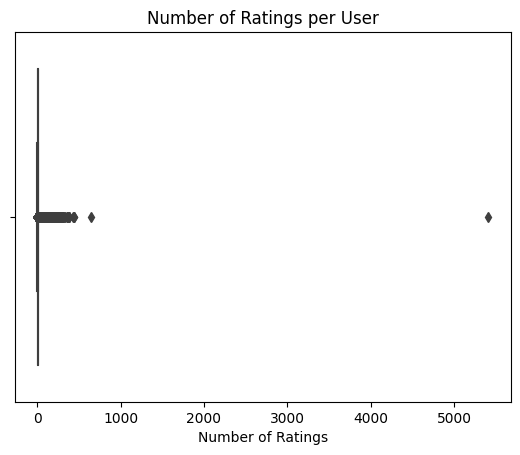

In [10]:
# Assuming `df_ratings` is your DataFrame with user ratings
user_activity = df_ratings['reviewers'].value_counts()
sns.boxplot(x=user_activity)
plt.title('Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.show()


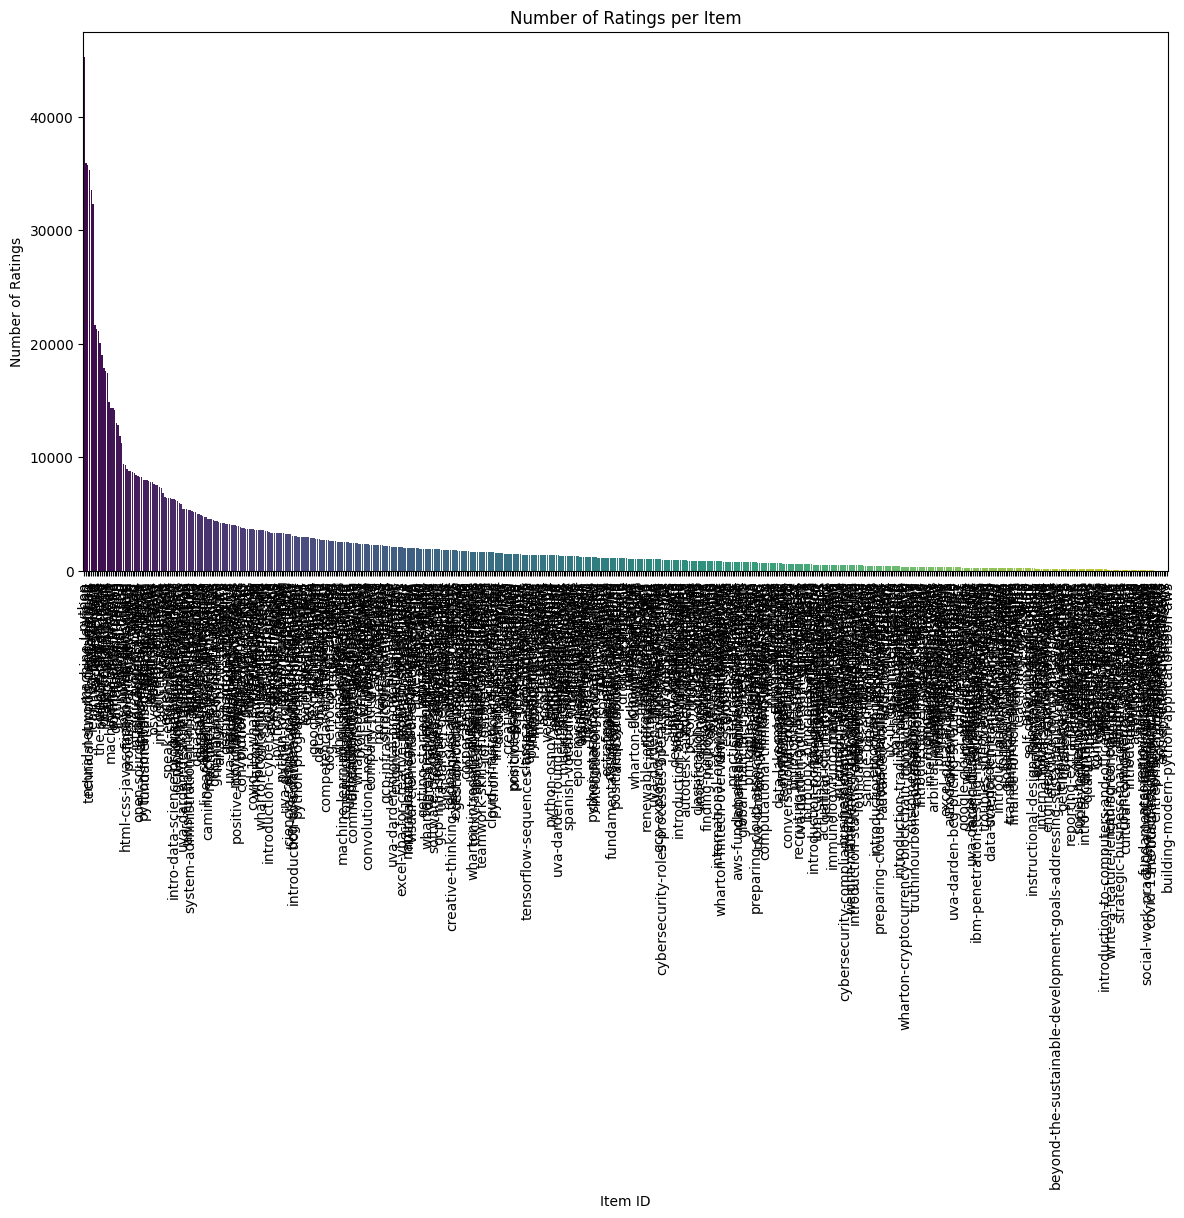

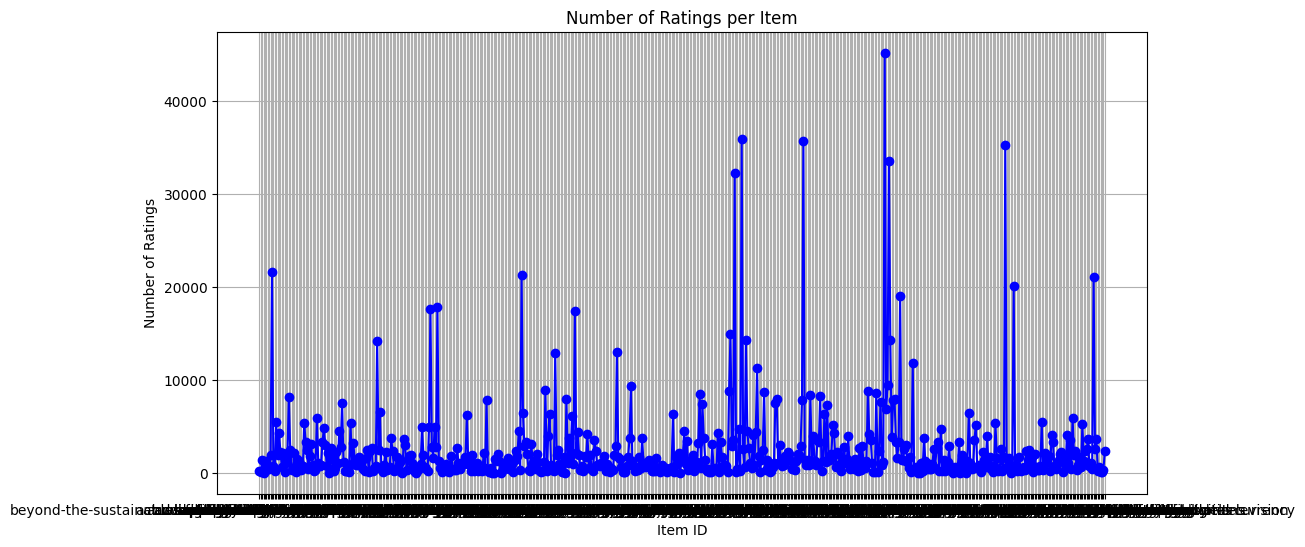

In [17]:
# Calculate the number of ratings per item
item_rating_counts = df_ratings['course_id'].value_counts().reset_index()
item_rating_counts.columns = ['course_id', 'rating_count']

# Sort the items by the number of ratings
item_rating_counts = item_rating_counts.sort_values('rating_count', ascending=False)

# Plot the bar graph
plt.figure(figsize=(14, 7))
sns.barplot(data=item_rating_counts, x='course_id', y='rating_count', palette='viridis')
plt.xticks(rotation=90)  # Rotate the x labels if there are many items
plt.title('Number of Ratings per Item')
plt.xlabel('Item ID')
plt.ylabel('Number of Ratings')
plt.show()

# Assuming df_ratings is your DataFrame and it contains 'item_id'
# First, we count the number of ratings per item
ratings_per_item = df_ratings['course_id'].value_counts().sort_index()

# Now, we create a line chart
plt.figure(figsize=(12, 6))
plt.plot(ratings_per_item.index, ratings_per_item.values, marker='o', linestyle='-', color='blue')
plt.title('Number of Ratings per Item')
plt.xlabel('Item ID')
plt.ylabel('Number of Ratings')
plt.grid(True)
plt.show()

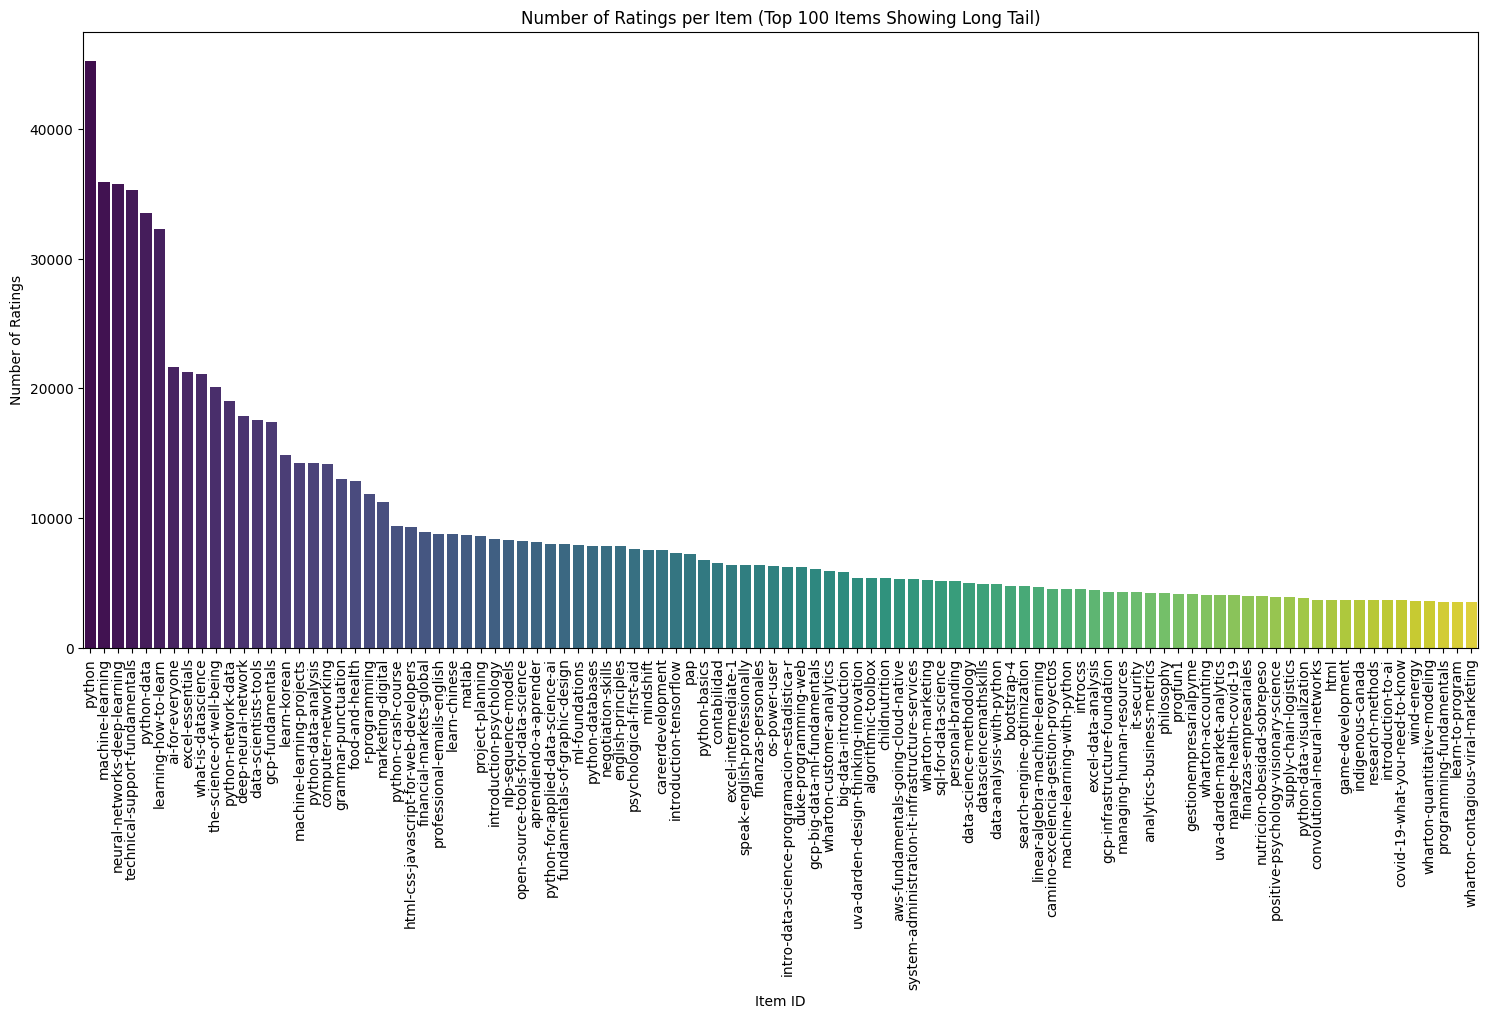

In [36]:
item_rating_counts = df_ratings['course_id'].value_counts().reset_index()
item_rating_counts.columns = ['course_id', 'rating_count']

# Sort the items by the number of ratings
item_rating_counts = item_rating_counts.sort_values('rating_count', ascending=False)

# Plot the bar graph for the top N items
top_n = 100  # for example, let's plot the top 100 items
plt.figure(figsize=(18, 8))
sns.barplot(data=item_rating_counts.head(top_n), x='course_id', y='rating_count', palette='viridis')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Setting the title and labels
plt.title('Number of Ratings per Item (Top 100 Items Showing Long Tail)')
plt.xlabel('Item ID')
plt.ylabel('Number of Ratings')

# Show the plot
plt.show()

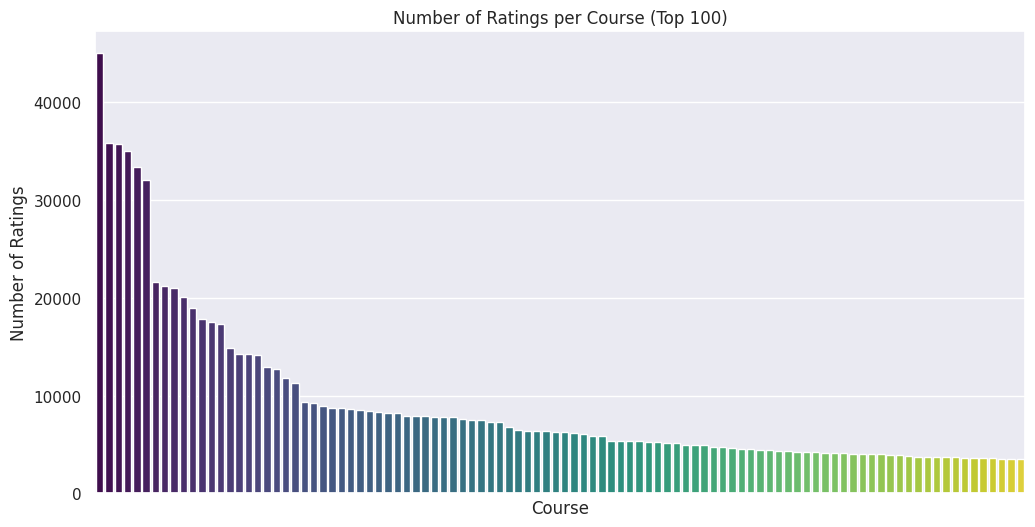

In [85]:
item_rating_counts = df_ratings['course_id'].value_counts().reset_index()
item_rating_counts.columns = ['course_id', 'rating_count']

# Sort the items by the number of ratings
item_rating_counts = item_rating_counts.sort_values('rating_count', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=np.arange(len(item_rating_counts.head(top_n))), y='rating_count', data=item_rating_counts.head(top_n), palette='viridis')

# We won't set any x-tick labels to avoid showing the course titles
plt.title('Number of Ratings per Course (Top 100)')
plt.xlabel('Course')
plt.ylabel('Number of Ratings')

# hide the x-axis ticks
plt.xticks([])

# Show the plot
plt.show()

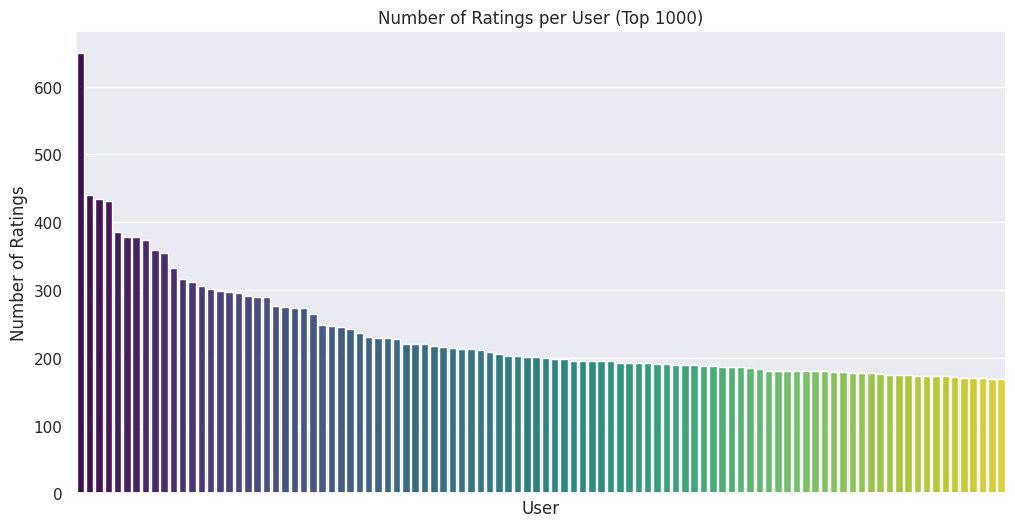

In [91]:
# remove user "deleted a"
df_ratings = df_ratings[df_ratings['reviewers'] != 'By Deleted A']

# The same but for users
user_rating_counts = df_ratings['reviewers'].value_counts().reset_index()
user_rating_counts.columns = ['user_id', 'rating_count']

# Sort the items by the number of ratings
user_rating_counts = user_rating_counts.sort_values('rating_count', ascending=False)

# Now, we create a line chart
plt.figure(figsize=(12, 6))
# plt.plot(user_rating_counts.index, user_rating_counts.values, marker='o', linestyle='-', color='blue')
top_n = 100
sns.barplot(x=np.arange(len(user_rating_counts.head(top_n))), y='rating_count', data=user_rating_counts.head(top_n), palette='viridis')

# Graph into bins of 100
# sns.histplot(data=user_rating_counts, x='rating_count', bins=10, kde=False)

plt.title('Number of Ratings per User (Top 1000)')
plt.xlabel('User')
plt.ylabel('Number of Ratings')
plt.xticks([])
plt.show()




In [56]:

df_ratings['reviewers'].value_counts().value_counts().sort_index()

# get number of users with 1-3 ratings
print(f"Number of users with 1-3 ratings: {df_ratings['reviewers'].value_counts().value_counts().sort_index()[0:3].sum()}")

# Ratio of users with 1-3 ratings
print(f"Ratio of users with 1-3 ratings: {df_ratings['reviewers'].value_counts().value_counts().sort_index()[0:3].sum() / len(df_ratings)}")

Number of users with 1-3 ratings: 210674
Ratio of users with 1-3 ratings: 0.14536268913454023
